In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

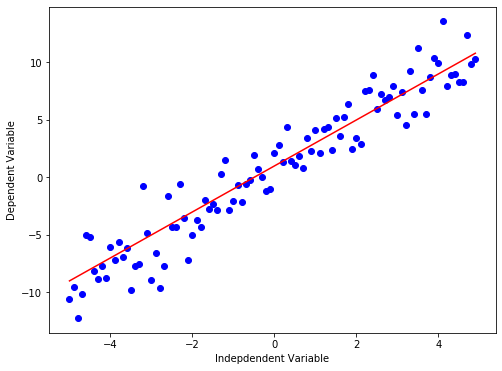

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = 2 *(x) + 1
y_noise = 2 * np.random.normal(size=x.size)

y_data = y + y_noise
plt.figure(figsize=(8,6))
plt.plot(x, y_data, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


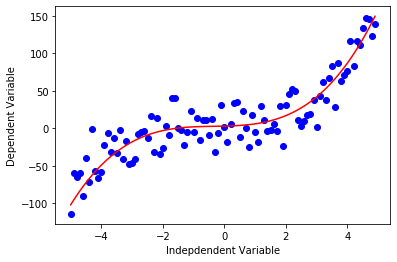

In [6]:
# cubic function graph

x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)

y_data = y + y_noise
plt.plot(x, y_data, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

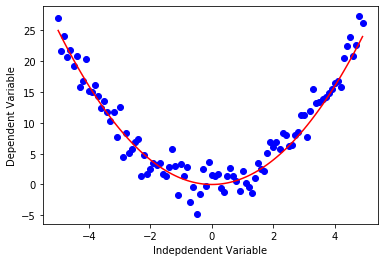

In [7]:
# quadratic

x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x, 2)
y_noise = 2 * np.random.normal(size=x.size)

y_data = y + y_noise
plt.plot(x, y_data, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

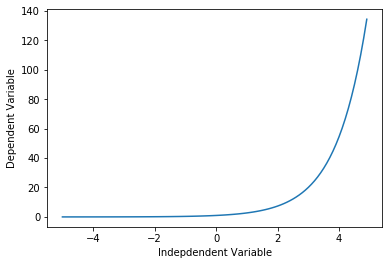

In [8]:
# exponential

X =  np.arange(-5.0, 5.0, 0.1)
Y = np.exp(X)

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


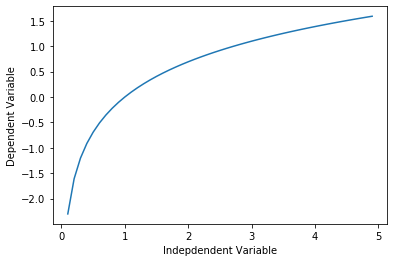

In [10]:
X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

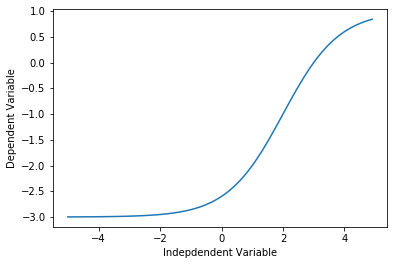

In [11]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))
plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [12]:
# non linear regression example

import pandas as pd
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

2020-07-06 23:51:56 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [13]:
df = pd.read_csv('china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


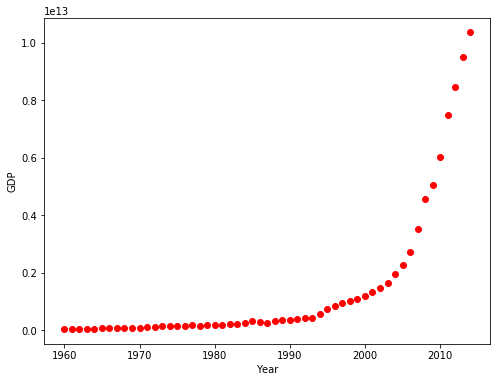

In [16]:
plt.figure(figsize=(8,6))

x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')

plt.show()

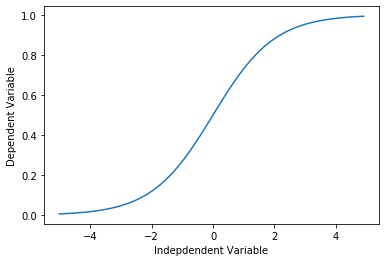

In [19]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1.0/(1.0 + np.exp(-X))

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [20]:
# building the model

def sigmoid(x, Beta_1, Beta_2):
    y = 1/(1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

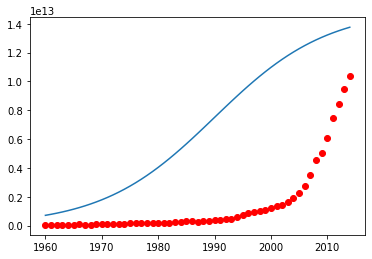

In [21]:
beta_1 = 0.10
beta_2 = 1990.0

Y_pred = sigmoid(x_data, beta_1, beta_2)
plt.plot(x_data, Y_pred*15000000000000)
plt.plot(x_data, y_data, 'ro')

In [22]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [23]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, xdata, ydata)

print('beta_1 = %f, beta_2 = %f' % (popt[0], popt[1]))

beta_1 = 690.451711, beta_2 = 0.997207


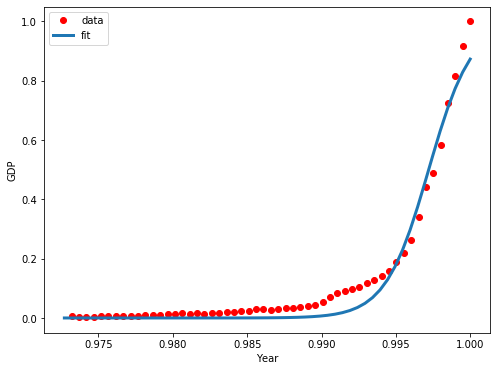

In [24]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,6))

y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label = 'data')
plt.plot(x, y, linewidth = 3.0, label = 'fit')
plt.legend(loc = 'best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [34]:
msk = np.random.rand(len(df)) < 0.8

train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)

y_hat = sigmoid(test_x, *popt)

print('Mean absolute error: %.2f' % np.mean(np.absolute(y_hat - test_y)))
print('Residual sum of error: %.2f' % np.mean((y_hat - test_y)**2))
print('R-2 score: %.2f' % r2_score(y_hat, test_y))

Mean absolute error: 0.02
Residual sum of error: 0.00
R-2 score: 0.97
